In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)

In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import datetime

In [106]:
xgbr = XGBR(n_estimators = 100).fit(xtrain,ytrain)
xgbr.predict(xtest)

array([26.047373 , 19.27156  , 17.419703 , 30.331837 , 23.68513  ,
       21.949282 , 19.64725  , 19.90638  , 12.469233 , 21.00463  ,
        9.925102 , 16.425846 , 24.094193 , 23.048134 , 14.24091  ,
       16.430988 , 24.016077 , 20.530228 , 35.238346 , 18.436668 ,
       15.640969 , 24.876879 , 19.00302  , 10.033549 , 32.05278  ,
       14.966631 , 48.872337 , 20.515526 , 21.020037 , 34.245125 ,
       20.143345 , 14.376893 , 30.167194 , 22.910336 , 20.465363 ,
       21.97722  , 23.92132  , 20.856354 ,  8.145865 , 18.755098 ,
       18.71041  , 31.138653 , 47.127243 , 21.352566 , 22.208708 ,
       23.683674 , 23.609434 , 23.465616 , 13.2577915, 20.836346 ,
       23.487583 , 16.415663 , 21.096363 , 31.577663 , 21.655655 ,
       23.745789 , 10.616294 , 46.500988 , 32.77767  , 14.178054 ,
       23.754965 , 10.935207 , 25.45291  , 20.045033 , 33.891277 ,
       25.448605 , 21.623684 , 48.407505 , 21.444788 , 20.38918  ,
       44.534767 , 28.117678 , 32.435486 , 22.696487 , 22.0071

In [107]:
xgbr.score(xtest,ytest)

0.8999293045750743

In [49]:
rfr = RFR(n_estimators = 100000).fit(xtrain,ytrain)
rfr.predict(xtest)

array([24.392704, 14.694077, 35.138696, 19.71756 , 31.857842, 23.185898,
       14.857877, 13.912838, 21.789395, 20.361109, 20.677656, 31.934058,
       15.677644, 23.46519 , 20.920162, 14.882949, 32.977837, 19.964792,
       41.925465, 19.978981, 18.170586, 20.325778, 23.209043, 23.02883 ,
       19.355676, 12.631719, 16.835658, 20.17291 , 21.511717, 18.873003,
       20.166909, 11.120916, 17.629197, 26.472266, 33.741158, 15.270083,
       22.137308, 21.025293, 21.381711, 41.450157, 14.662314, 22.192237,
       31.248684, 32.217641, 15.281362, 47.349013, 33.65477 , 20.027704,
       22.334574, 22.816852,  8.600463, 21.14163 , 31.441396, 11.883668,
       14.861486, 19.939291, 22.227803, 24.652739, 40.735916, 22.365233,
       19.889824, 29.320637,  7.065104, 25.878331, 10.338477, 23.276539,
       46.056374, 23.707299, 19.943014, 21.20428 , 26.868448, 11.620539,
       20.034979, 22.891688, 19.929436, 15.981113, 20.229233, 19.988765,
       25.834003, 31.26035 , 20.21334 ,  8.708331, 

In [50]:
rfr.score(xtest,ytest)

0.8859164612876868

In [51]:
print(mean_squared_error(ytest,xgbr.predict(xtest)));print(mean_squared_error(ytest,rfr.predict(xtest)))              

6.828640362019303
8.936600296533783


In [52]:
xgbr.feature_importances_

array([0.01438409, 0.00110051, 0.00624651, 0.0010155 , 0.04130676,
       0.18265772, 0.00747729, 0.03354212, 0.00877754, 0.04604776,
       0.05181263, 0.01276587, 0.59286565], dtype=float32)

In [53]:
rfr.feature_importances_

array([0.03729133, 0.00122844, 0.00563284, 0.00101516, 0.02672771,
       0.44079264, 0.01175628, 0.06120691, 0.00350391, 0.01409217,
       0.0169983 , 0.01279169, 0.36696263])

In [14]:
##使用交叉验证对比xgboost和rf和LinearR
xgbr_ = XGBR(n_estimators = 10000)
cross_val_score(xgbr_,xtrain,ytrain,cv = 5).mean()

0.8534259109511714

In [15]:
cross_val_score(xgbr_,xtrain,ytrain,scoring = "neg_mean_squared_error").mean()

-12.49231193667455

In [16]:
rfr_ = RFR(n_estimators = 10000)
cross_val_score(rfr_,xtrain,ytrain,cv = 5).mean()

0.8651849637825396

In [17]:
cross_val_score(rfr_,xtrain,ytrain,scoring = "neg_mean_squared_error").mean()

-11.747856730880963

In [18]:
lr_ = LinearR()
cross_val_score(lr_,xtrain,ytrain,cv = 5).mean()

0.7096565219689432

In [19]:
cross_val_score(lr_,xtrain,ytrain,scoring = "neg_mean_squared_error").mean()

-25.792659105165864

In [108]:
#NB中的学习曲线绘制
def plot_learning_curve (estimator,
                         title,
                         x,
                         y,
                         subplot = None,
                         ylim = None,
                         cv = None,
                         n_jobs = None
                        ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes,train_scores,test_scores = learning_curve(estimator,
                                                          x,y,
                                                          cv = cv
                                                          #,random_state = 420
                                                          ,n_jobs = n_jobs
                                                         )
    
    if subplot == None:
        subplot = plt.gca()
    else:
        subplot = plt.figure()
    
    subplot.set_title(title)
    
    if ylim is not None:
        subplot.set_ylim(*ylim)
        
    subplot.set_xlabel ("Triaing examples")
    subplot.set_ylabel ("Score")
    subplot.grid()
    subplot.plot(train_sizes,np.mean(train_scores,axis = 1),
                 "o-",
                 color = "r",
                 label =  "Training Score"
                )
    subplot.plot(train_sizes,np.mean(test_scores,axis = 1),
                 "o-", #带点的直线
                 color = "g",
                 label =  "Testing Score"
                )
    subplot.legend(loc = 0)
    
    return subplot

In [109]:
cv = KFold(n_splits = 5,shuffle = True,random_state = 42)

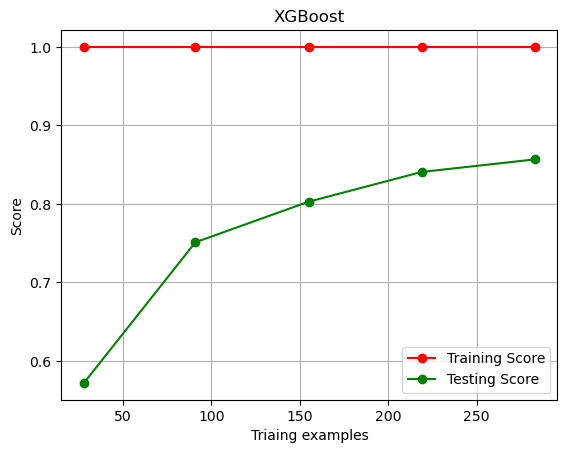

In [110]:
plot_learning_curve(XGBR(n_estimators = 1000,random_state = 420),
                    "XGBoost",
                    xtrain,ytrain,
                    subplot = None,
                    cv = cv
                   )
plt.show()      

60 0.8617294545358941


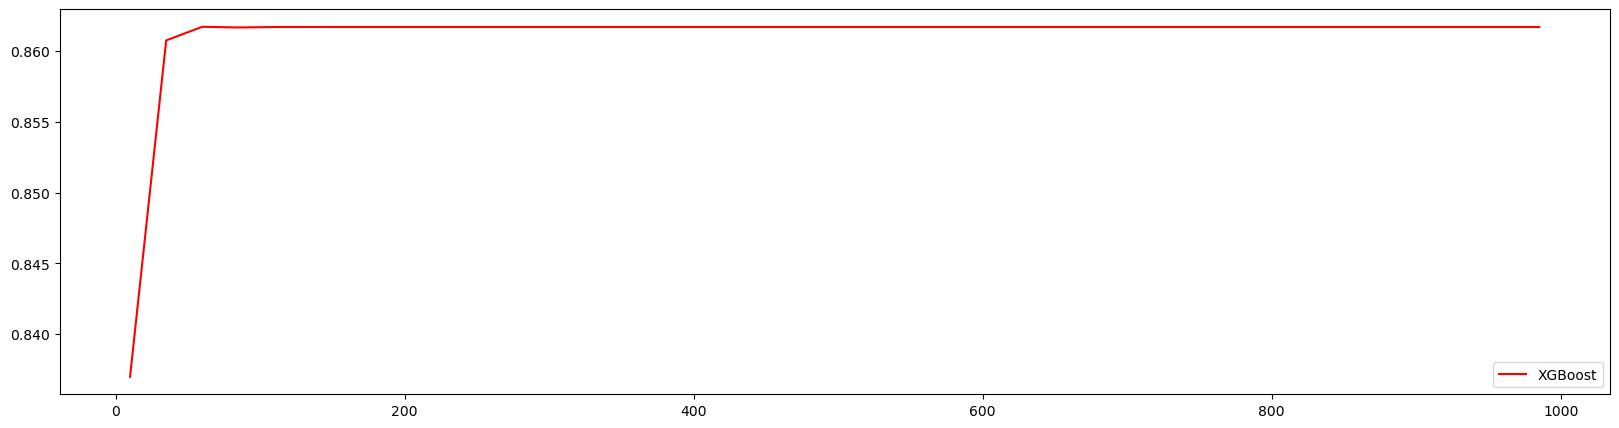

In [111]:
#n_estimators学习曲线
estimator = range(10,1010,25)
r2 = []
for i in estimator:
    xgbr = XGBR(n_estimators = i,
                random_state = 420)
    r2.append(cross_val_score(xgbr,xtrain,ytrain,cv = cv).mean())
print(estimator[r2.index(max(r2))],max(r2))
plt.figure(figsize = (20,5))
plt.plot(estimator,r2,c = "red",label = "XGBoost")
plt.legend()
plt.show()

60 0.8617294545358941
10 0.00035356567283266477
Minimum Generalization Error:
Estimator: 60
Generalization Error: 0.019852607830396433
R2: 0.8617294545358941
Var: 0.0007338640874550609


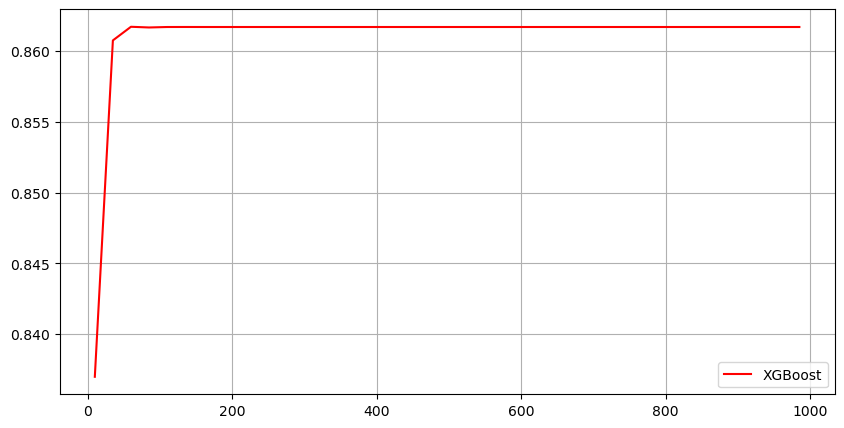

In [112]:
##不仅仅使用r2,同时使用方差和泛化误差来画学习曲线
estimator = range(10, 1010, 25)
r2 = []
var = []
Generalization_error = []

for i in estimator:
    xgbr = XGBR(n_estimators=i, random_state=420)
    r2_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).mean()
    var_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).var()
    r2.append(r2_)
    var.append(var_)
    Generalization_error.append((1 - r2_) ** 2 + var_)

min_generalization_error_index = Generalization_error.index(min(Generalization_error))
min_generalization_error = min(Generalization_error)
r2_min_generalization_error = r2[min_generalization_error_index]
var_min_generalization_error = var[min_generalization_error_index]

print(estimator[r2.index(max(r2))],max(r2))
print(estimator[var.index(min(var))],min(var))

print("Minimum Generalization Error:")
print("Estimator:", estimator[min_generalization_error_index])
print("Generalization Error:",min(Generalization_error))
print("R2:", r2_min_generalization_error)
print("Var:", var_min_generalization_error)


plt.figure(figsize=(10, 5))
plt.plot(estimator, r2, c="red", label="XGBoost")
plt.grid()
plt.legend(loc = 0)
plt.show()

50 0.8617733791636205
20 0.0006872718804338078
Minimum Generalization Error:
Estimator: 50
Generalization Error: 0.019841672185365596
R2: 0.8617733791636205
Var: 0.0007350734775213745


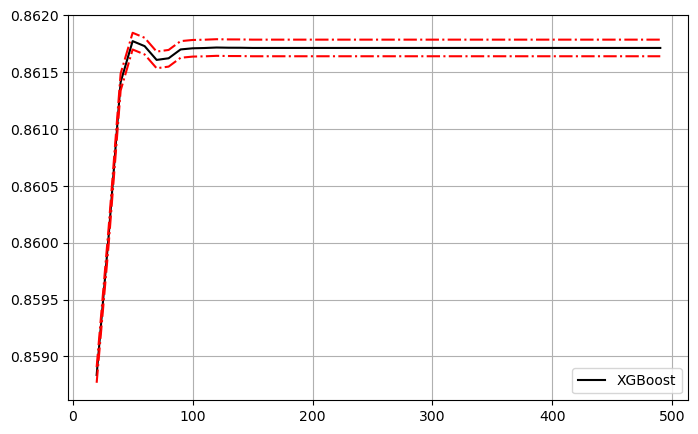

In [114]:
estimator = range(20, 500, 10)
r2 = []
var = []
Generalization_error = []

for i in estimator:
    xgbr = XGBR(n_estimators=i, random_state=420)
    r2_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).mean()
    var_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).var()
    r2.append(r2_)
    var.append(var_)
    Generalization_error.append((1 - r2_) ** 2 + var_)

min_generalization_error_index = Generalization_error.index(min(Generalization_error))
min_generalization_error = min(Generalization_error)
r2_min_generalization_error = r2[min_generalization_error_index]
var_min_generalization_error = var[min_generalization_error_index]

print(estimator[r2.index(max(r2))],max(r2))
print(estimator[var.index(min(var))],min(var))

print("Minimum Generalization Error:")
print("Estimator:", estimator[min_generalization_error_index])
print("Generalization Error:",min(Generalization_error))
print("R2:", r2_min_generalization_error)
print("Var:", var_min_generalization_error)

r2 = np.array(r2)
var = np.array(var) * 0.1
plt.figure(figsize=(8, 5))
plt.plot(estimator, r2, c="k", label="XGBoost")
plt.plot(estimator, r2+var,c = "red",linestyle = '-.')
plt.plot(estimator, r2-var,c = "red",linestyle = '-.')
plt.grid()
plt.legend(loc = 0)
plt.show()

In [116]:
time0 = time()
print(XGBR(n_estimators = 50,random_state = 420).fit(xtrain,ytrain).score(xtest,ytest))
print(time() - time0)

0.8996935737110138
0.02552318572998047


In [122]:
time0 = time()
print(XGBR(n_estimators = 100,random_state = 420).fit(xtrain,ytrain).score(xtest,ytest))
print(time() - time0)

0.8999293045750743
0.04783272743225098


In [127]:
time0 = time()
print(XGBR(n_estimators = 150,random_state = 420).fit(xtrain,ytrain).score(xtest,ytest))
print(time() - time0)

0.8999403123373683
0.07252049446105957


In [123]:
time0 = time()
print(XGBR(n_estimators = 20000,random_state = 420).fit(xtrain,ytrain).score(xtest,ytest))
print(time() - time0)

0.8999404389203083
3.158529758453369


0.8979591836734693 0.8735391685433846


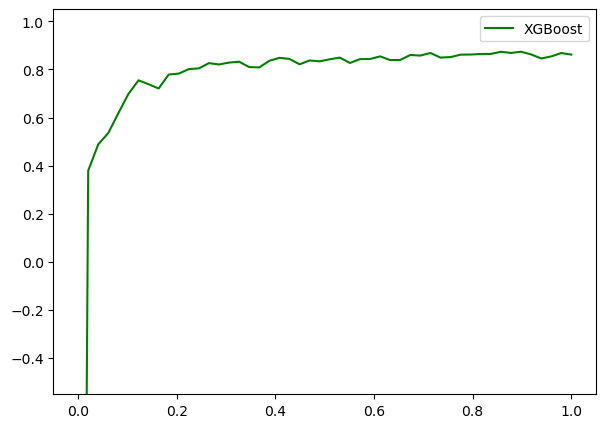

In [128]:
#使用subsample来控制随机抽样过程
#subsample学习曲线
subsample_ = np.linspace(0,1,50)
r2 = []
for i in subsample_:
    xgbr = XGBR(n_estimators = 150,
                subsample = i,
                random_state = 420)
    r2.append(cross_val_score(xgbr,xtrain,ytrain,cv = cv).mean())
    
print(subsample_[r2.index(max(r2))],max(r2))
plt.figure(figsize = (7,5))
plt.plot(subsample_,r2,c = "g",label = "XGBoost")
plt.legend()
plt.ylim(-0.55, 1.05)
plt.show()

0.8560000000000001 0.8757190541482105
0.5840000000000001 0.00014452737273512841
Minimum Generalization Error:
Estimator: 0.8560000000000001
Generalization Error: 0.016672973972262015
R2: 0.8757190541482105
Var: 0.0012272204704465801


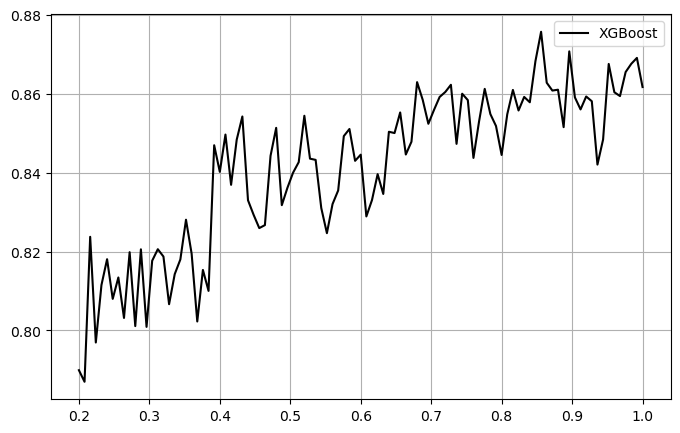

In [131]:
subsample_ = np.linspace(0.2,1,101)
r2 = []
var = []
Generalization_error = []

for i in subsample_:
    xgbr = XGBR(n_estimators=100,subsample = i, random_state=420)
    r2_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).mean()
    var_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).var()
    r2.append(r2_)
    var.append(var_)
    Generalization_error.append((1 - r2_) ** 2 + var_)

min_generalization_error_index = Generalization_error.index(min(Generalization_error))
min_generalization_error = min(Generalization_error)
r2_min_generalization_error = r2[min_generalization_error_index]
var_min_generalization_error = var[min_generalization_error_index]

print(subsample_[r2.index(max(r2))],max(r2))
print(subsample_[var.index(min(var))],min(var))
print("Minimum Generalization Error:")
print("Estimator:", subsample_[min_generalization_error_index])
print("Generalization Error:",min(Generalization_error))
print("R2:", r2_min_generalization_error)
print("Var:", var_min_generalization_error)

#r2 = np.array(r2)
#var = np.array(var) * 0.1
plt.figure(figsize=(8, 5))
plt.plot(subsample_, r2, c="k", label="XGBoost")
#plt.plot(estimator, r2+var,c = "red",linestyle = '-.')
#plt.plot(estimator, r2-var,c = "red",linestyle = '-.')
plt.grid()
plt.legend(loc = 0)
plt.show()

0.8500000000000001 0.8846852123290516
0.948 0.00035537571351764504
Minimum Generalization Error:
Estimator: 0.8500000000000001
Generalization Error: 0.013793849643043646
R2: 0.8846852123290516
Var: 0.0004963493874477374


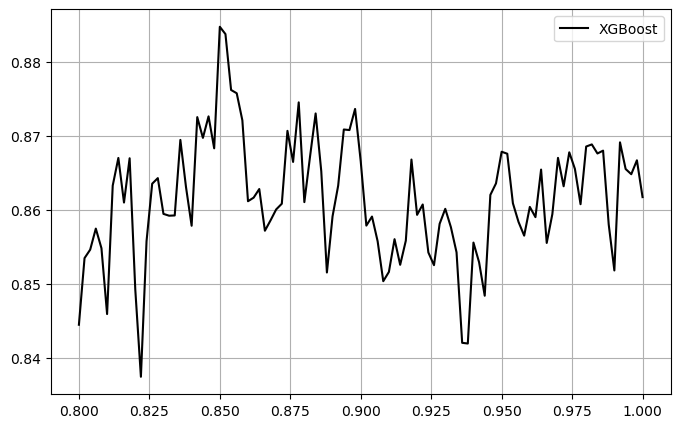

In [132]:
subsample_ = np.linspace(0.8,1,101)
r2 = []
var = []
Generalization_error = []

for i in subsample_:
    xgbr = XGBR(n_estimators=100,subsample = i, random_state=420)
    r2_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).mean()
    var_ = cross_val_score(xgbr, xtrain, ytrain, cv=cv).var()
    r2.append(r2_)
    var.append(var_)
    Generalization_error.append((1 - r2_) ** 2 + var_)

min_generalization_error_index = Generalization_error.index(min(Generalization_error))
min_generalization_error = min(Generalization_error)
r2_min_generalization_error = r2[min_generalization_error_index]
var_min_generalization_error = var[min_generalization_error_index]

print(subsample_[r2.index(max(r2))],max(r2))
print(subsample_[var.index(min(var))],min(var))
print("Minimum Generalization Error:")
print("Estimator:", subsample_[min_generalization_error_index])
print("Generalization Error:",min(Generalization_error))
print("R2:", r2_min_generalization_error)
print("Var:", var_min_generalization_error)

plt.figure(figsize=(8, 5))
plt.plot(subsample_, r2, c="k", label="XGBoost")
plt.grid()
plt.legend(loc = 0)
plt.show()

In [133]:
model = XGBR(n_estimators = 100,
             subsample = 0.85,
            ).fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8926382787262174

In [134]:
mean_squared_error(ytest,model.predict(xtest))

9.123850191722502

In [35]:
##参数eta:迭代决策树的步长 (learning rate)

In [135]:
#使用网格搜索搜索最好的eta取值
from sklearn.model_selection import GridSearchCV
eta_range = np.linspace(0.01, 0.51, 20)
xgbr = XGBR(n_estimators=100, subsample=0.85)

param_grid = {'eta': eta_range}
grid_search = GridSearchCV(xgbr, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

best_eta = grid_search.best_params_['eta']
best_score = grid_search.best_score_

final_model = XGBR(n_estimators=100, subsample=0.85, eta=best_eta).fit(xtrain, ytrain)
final_score = final_model.score(xtest, ytest)

print("Best eta (learning rate):", best_eta)
print("Best Cross-Validation Score:", best_score)
print("Final Model Score on Test Set:", final_score)

Best eta (learning rate): 0.06263157894736841
Best Cross-Validation Score: 0.874831233207568
Final Model Score on Test Set: 0.8958255418731553


In [136]:
from sklearn.model_selection import GridSearchCV
eta_range = np.linspace(0.05, 0.8, 61)
xgbr = XGBR(n_estimators=70, subsample=0.622)

param_grid = {'eta': eta_range}
grid_search = GridSearchCV(xgbr, param_grid, cv=10)
grid_search.fit(xtrain, ytrain)

best_eta = grid_search.best_params_['eta']
best_score = grid_search.best_score_

final_model = XGBR(n_estimators=70, subsample=0.622, eta=best_eta).fit(xtrain, ytrain)
final_score = final_model.score(xtest, ytest)

print("Best eta (learning rate):", best_eta)
print("Best Cross-Validation Score:", best_score)
print("Final Model Score on Test Set:", final_score)

Best eta (learning rate): 0.1125
Best Cross-Validation Score: 0.8807096429024242
Final Model Score on Test Set: 0.8842636951933438


In [137]:
model = XGBR(n_estimators = 100,
             subsample = 0.85,
             learning_rate = 0.1125
            ).fit(xtrain,ytrain)
model.score(xtest,ytest)

0.89986383253211

In [138]:
###写一个评分函数:直接打印xtrain的交叉验证结果
def CVScore(model,xtrain,ytrain,cv,scoring = ["r2"],show = True):
    score = []
    for i in range (len(scoring)):
        if show:
            print("{}:{:.4f}".format(scoring[i],
                                     cross_val_score(model,
                                                     xtrain,ytrain,
                                                     cv = cv,
                                                     scoring = scoring[i]
                                                    ).mean()
                                    )
                 )
        score.append(cross_val_score(model,xtrain,ytrain,cv = cv,scoring = scoring[i]).mean())
    return score

In [140]:
model = XGBR(n_estimators = 100,
             learning_rate = 0.1125,
             subsample = 0.85
            )
CVScore(model,xtrain,ytrain,5,scoring = ["r2","neg_mean_squared_error"])

r2:0.8726
neg_mean_squared_error:-10.7490


[0.8726126979153724, -10.74896617135791]

In [141]:
for i in [0,0.01,0.02,0.05,0.075,0.1,0.2,0.5,0.75,1]:
    time0 = time()
    model = XGBR(n_estimators = 145,subsample = 0.908,learning_rate = i)
    print("learning_rate = {}".format(i))
    CVScore(model,xtrain,ytrain,cv,scoring = ['r2','neg_mean_squared_error'])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S'))
    print("\t")

learning_rate = 0
r2:-5.9620
neg_mean_squared_error:-564.9903
00:00
	
learning_rate = 0.01
r2:0.3740
neg_mean_squared_error:-51.0446
00:00
	
learning_rate = 0.02
r2:0.8170
neg_mean_squared_error:-14.8561
00:00
	
learning_rate = 0.05
r2:0.8741
neg_mean_squared_error:-10.1714
00:01
	
learning_rate = 0.075
r2:0.8799
neg_mean_squared_error:-9.6886
00:01
	
learning_rate = 0.1
r2:0.8782
neg_mean_squared_error:-9.8650
00:01
	
learning_rate = 0.2
r2:0.8664
neg_mean_squared_error:-10.8084
00:01
	
learning_rate = 0.5
r2:0.8340
neg_mean_squared_error:-13.3307
00:00
	
learning_rate = 0.75
r2:0.7306
neg_mean_squared_error:-21.4031
00:00
	
learning_rate = 1
r2:0.7314
neg_mean_squared_error:-21.7765
00:00
	


In [142]:
#eta和n_estimators网格搜索优化
from sklearn.model_selection import GridSearchCV
eta_range = np.linspace(0.01, 0.22, 31)
n_estimators_range = list(range(25, 451, 25))

param_grid = {'eta': eta_range, 'n_estimators': n_estimators_range}
xgbr = XGBR(subsample=1)

grid_search = GridSearchCV(xgbr, param_grid, cv=5)
grid_search.fit(xtrain, ytrain)

best_eta = grid_search.best_params_['eta']
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

final_model = XGBR(subsample=1, eta=best_eta, n_estimators=best_n_estimators).fit(xtrain, ytrain)
final_score = final_model.score(xtest, ytest)

print("Best eta (learning rate):", best_eta)
print("Best n_estimators:", best_n_estimators)
print("Best Cross-Validation Score:", best_score)
print("Final Model Score on Test Set:", final_score)

Best eta (learning rate): 0.108
Best n_estimators: 400
Best Cross-Validation Score: 0.865988396039483
Final Model Score on Test Set: 0.8992368753397328


In [143]:
####参数n_estimators,learning_rate,subsample都针对于xgboost的算法本身
##更多的调参是针对于弱评估器
#参数booster指弱评估其的选择
for booster in ["gbtree","gblinear","dart"]:
    model = XGBR(n_estimators = 400,
                 learning_rate = 0.108,
                 booster = booster,
                 sampling_method="uniform"
                ).fit(xtrain,ytrain)
    print(booster)
    print(model.score(xtest,ytest))

gbtree
0.8992368753397328
[15:04:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sampling_method" } are not used.

gblinear
0.7050417473869357
dart
0.8992368983321586


In [144]:
#重要参数objective

In [145]:
import xgboost as xgb
from sklearn.metrics import r2_score
data_train = xgb.DMatrix(xtrain,ytrain)
data_test = xgb.DMatrix(xtest,ytest)
#注意data_train和data_test无法读取

In [146]:
#设定参数字典
param = {'silent' : True,
         'objective' : 'reg:squarederror',
         'eta' : 0.108
        }
num_round = 400
#num_round是n_estimators
#eta是learning rate

In [147]:
#建立模型
model = xgb.train(param,data_train,num_round)
#predict接口
predict = model.predict(data_test)

[15:04:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [148]:
r2_score(ytest,predict)

0.8992368753397328

In [149]:
model = XGBR(n_estimators = 400,
             learning_rate = 0.108,
            ).fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8992368753397328

In [156]:
#L1正则项参数:reg_alpha (默认为0)
#L2正则项参数:reg_lambda (默认为1)

#使用网格搜索探索最佳正则化参数
from sklearn.model_selection import GridSearchCV as GS

param = {'reg_alpha' : np.arange(0,5,0.1),
         'reg_lambda' : np.arange(0,5,0.1)
        }
result = GS(model,param_grid = param,scoring = "r2",cv = cv)

In [157]:
time0 = time()
result.fit(xtrain,ytrain)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S"))

20:37


In [158]:
result.best_params_

{'reg_alpha': 2.7, 'reg_lambda': 0.1}

In [159]:
result.best_score_

0.8892175273828997

In [161]:
##重要参数gamma
#信息增益(Gain)低于某个值时,cart树停止生长
#防止过拟合的重要参数,(复杂性控制)
#gamma越大,模型越简单

gamma_range = np.arange (0,5,0.05)

r2 = []
var = []
Generalization_error = []

for i in gamma_range:
    model = XGBR(n_estimators=400,learning_rate = 0.108, random_state=420,gamma = i)
    result = cross_val_score(model, xtrain, ytrain, cv=cv)
    r2.append(result.mean())
    var.append(result.var())
    Generalization_error.append((1 - result.mean()) ** 2 + result.var())

print(gamma_range[r2.index(max(r2))],max(r2),var[r2.index(max(r2))])
print(gamma_range[var.index(min(var))],min(var),r2[var.index(min(var))])

1.35 0.8781976835585837 0.0005684151002482108
3.35 0.0003479083728524006 0.8721891287660501


In [162]:
print(gamma_range[Generalization_error.index(min(Generalization_error))],
      r2[Generalization_error.index(min(Generalization_error))],
      var[Generalization_error.index(min(Generalization_error))])

2.85 0.8778266377425131 0.00040073677279962703


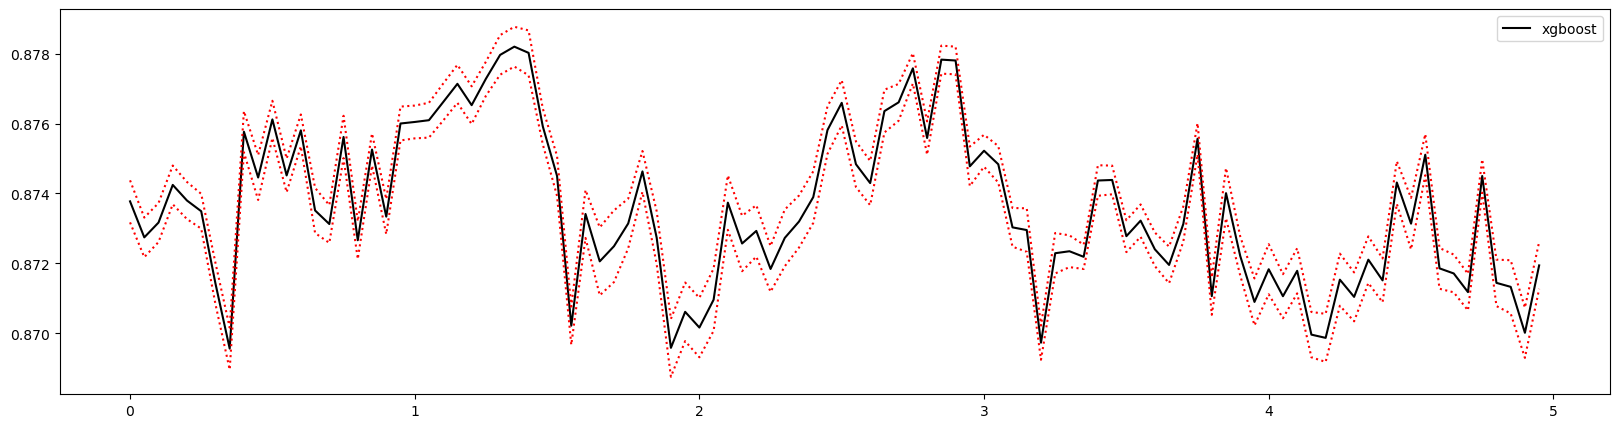

In [170]:
plt.figure(figsize=(20, 5))
plt.plot(gamma_range, r2, c="k", label="xgboost")
plt.plot(gamma_range, np.array(r2) + np.array(var), c="r", linestyle=':')
plt.plot(gamma_range, np.array(r2) - np.array(var), c="r", linestyle=':')
plt.legend()
plt.show()

In [10]:
#使用xgboost api(交叉验证)来调整gamma
data_full = xgb.DMatrix(x, y)
param = {'objective': 'reg:squarederror',
         'eta': 0.108,
         'gamma': 0
        }
num_round = 400
n_fold = 100

cvresult = xgb.cv(param, data_full, num_round, n_fold)

In [179]:
cvresult
#进行了400轮交叉验证,随着树不断在增加,模型效果如何变化

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.412844,0.043876,21.009808,4.330085
1,19.214947,0.038583,18.866228,3.976767
2,17.252231,0.034401,16.930015,3.666777
3,15.500342,0.030114,15.228069,3.414773
4,13.938863,0.028342,13.682885,3.186599
...,...,...,...,...
395,0.013633,0.001925,2.566336,1.413175
396,0.013467,0.001902,2.566345,1.413149
397,0.013326,0.001893,2.566364,1.413160
398,0.013178,0.001872,2.566366,1.413184


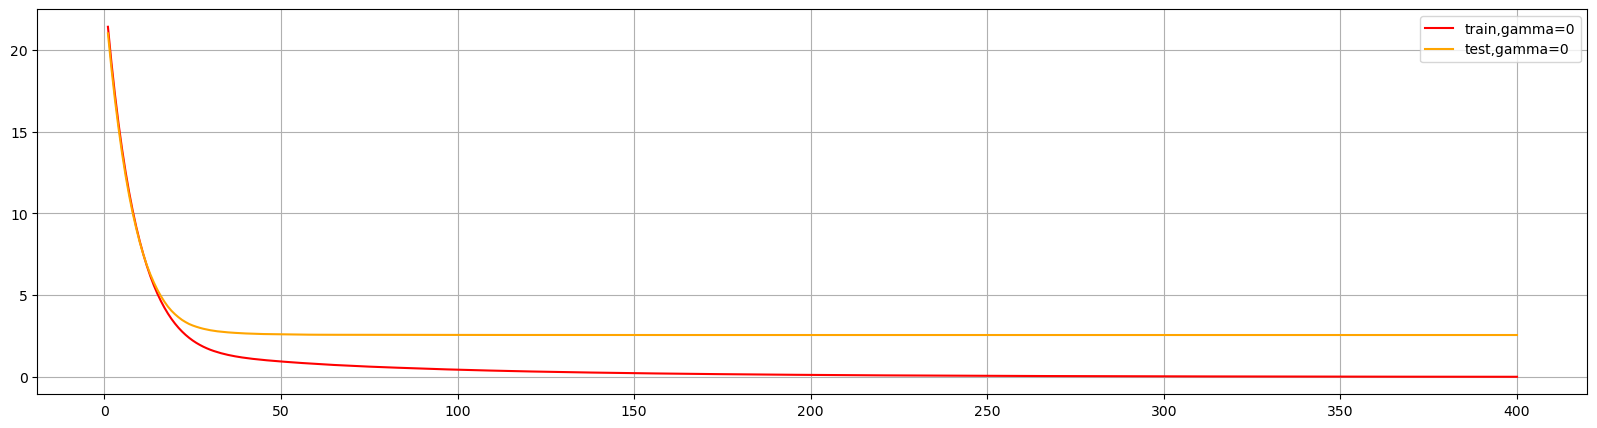

In [180]:
plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(range(1,401), cvresult.iloc[:,0], c="red", label="train,gamma=0")
plt.plot(range(1,401), cvresult.iloc[:,2], c="orange", label="test,gamma=0")
plt.legend()
plt.show()

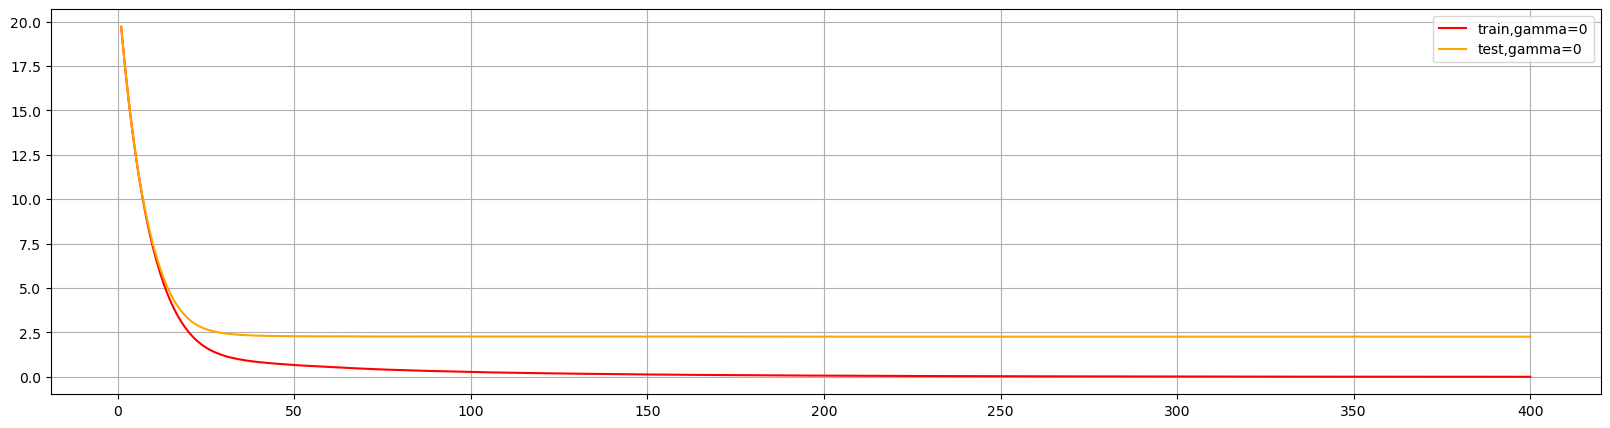

In [189]:
#更换评估指标
param = {'objective': 'reg:squarederror',
         'eta': 0.108,
         'gamma': 0,
         'eval_metric': 'mae'
        }
num_round = 400
n_fold = 10

cvresult = xgb.cv(param, data_full, num_round, n_fold)

plt.figure(figsize=(20, 5))
plt.grid()
plt.plot(range(1,401), cvresult.iloc[:,0], c="red", label="train,gamma=0")
plt.plot(range(1,401), cvresult.iloc[:,2], c="orange", label="test,gamma=0")
plt.legend()
plt.show()

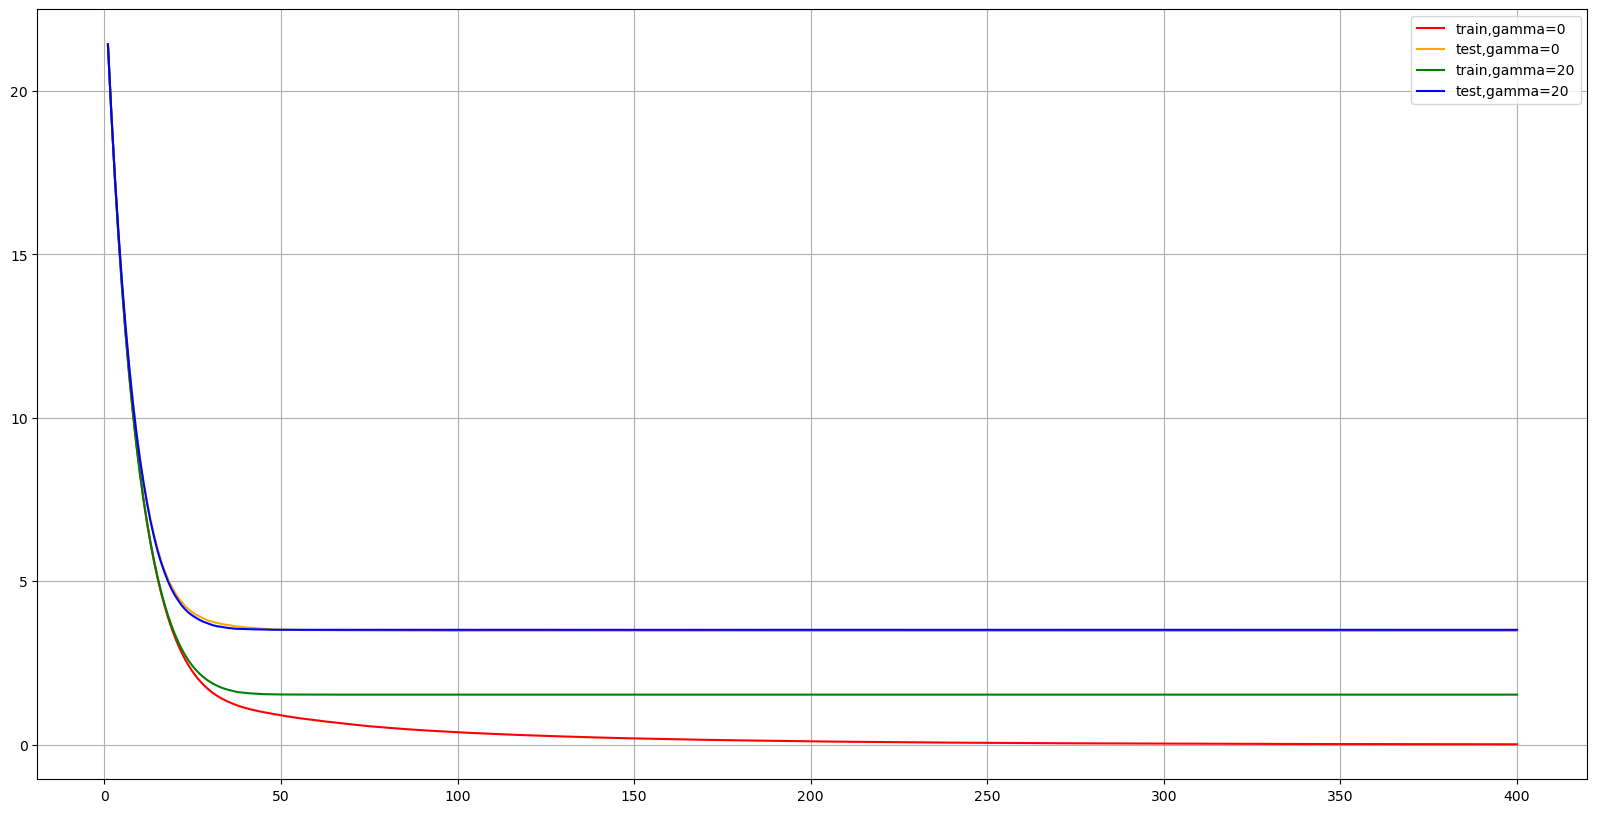

In [200]:
#设定不同的gamma值
#gamma是通过控制训练集上面的表现控制过拟合的
#gamma不一定会提升测试集上的表现
param1 = {'objective': 'reg:squarederror',
         'eta': 0.108,
         'gamma': 0,
         'eval_metric': 'rmse'
        }
param2 = {'objective': 'reg:squarederror',
         'eta': 0.108,
         'gamma': 20,
         'eval_metric': 'rmse'
        }
num_round = 400
n_fold = 10

cvresult1 = xgb.cv(param1, data_full, num_round, n_fold)
cvresult2 = xgb.cv(param2, data_full, num_round, n_fold)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(range(1,401), cvresult1.iloc[:,0], c="red", label="train,gamma=0")
plt.plot(range(1,401), cvresult1.iloc[:,2], c="orange", label="test,gamma=0")
plt.plot(range(1,401), cvresult2.iloc[:,0], c="green", label="train,gamma=20")
plt.plot(range(1,401), cvresult2.iloc[:,2], c="blue", label="test,gamma=20")
plt.legend()
plt.show()

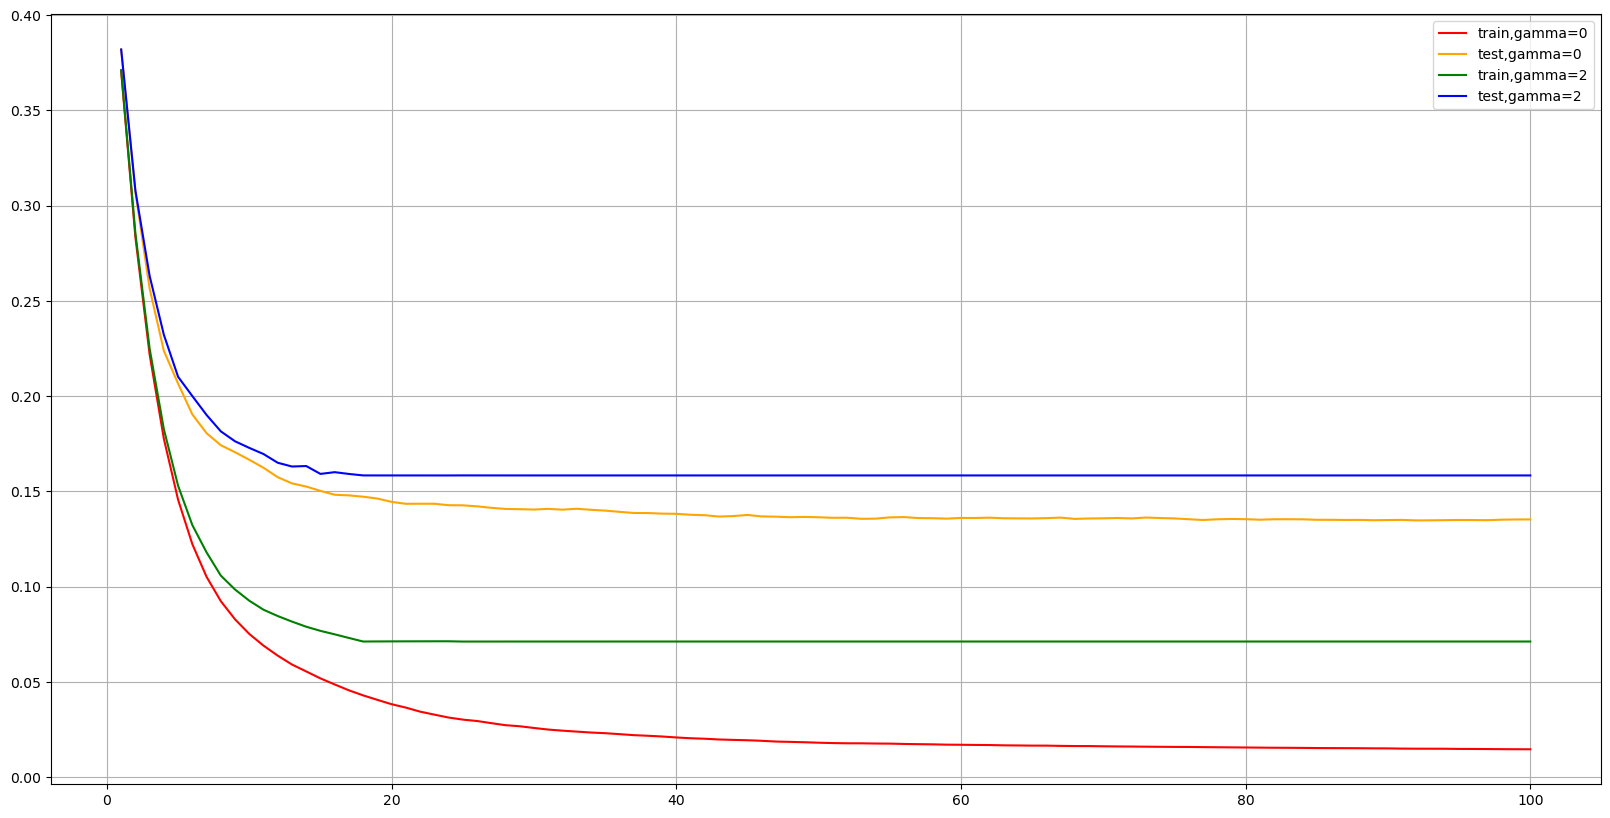

In [222]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()
x2 = data2.data
y2 = data2.target
data_full2 = xgb.DMatrix(x2,y2)

param1 = {'objective': 'binary:logistic',
          'gamma': 0,
          'eval_metric': 'rmse'
         }
          
param2 = {'objective': 'binary:logistic',
          'gamma': 2,
          'eval_metric': 'rmse'
         }
num_round = 100
n_fold = 10
cvresult1 = xgb.cv(param1, data_full2, num_round, n_fold)
cvresult2 = xgb.cv(param2, data_full2, num_round, n_fold)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(range(1,101), cvresult1.iloc[:,0], c="red", label="train,gamma=0")
plt.plot(range(1,101), cvresult1.iloc[:,2], c="orange", label="test,gamma=0")
plt.plot(range(1,101), cvresult2.iloc[:,0], c="green", label="train,gamma=2")
plt.plot(range(1,101), cvresult2.iloc[:,2], c="blue", label="test,gamma=2")
plt.legend()
plt.show()

00:00


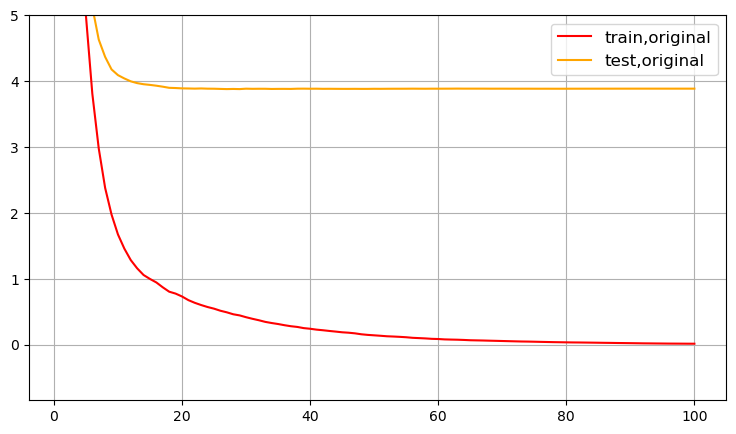

In [240]:
##原始模型的参数
param_ori = {'objective': 'reg:squarederror',
             'subsample' : 1,
             'max_depth' : 6,
             'eta': 0.3,
             'gamma': 0,
             'lambda': 1,
             'alpha': 0,
             'colsample_bytree': 1,
             'colsample_bylevel': 1,
             'colsample_bynode': 1,
             'eval_metric': 'rmse'
            }
num_round = 100

time0 = time()
cvresult = xgb.cv(param_ori,data_full,num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S"))

fig,subplot = plt.subplots(1,figsize = (9,5))
subplot.grid()
subplot.plot(range(1,101),cvresult.iloc[:,0],c = 'r',label = 'train,original')
subplot.plot(range(1,101),cvresult.iloc[:,2],c = 'orange',label = 'test,original')
subplot.legend(loc = 0,fontsize = 'large')
subplot.set_ylim(top = 5)
plt.show()

00:00
00:00
00:00


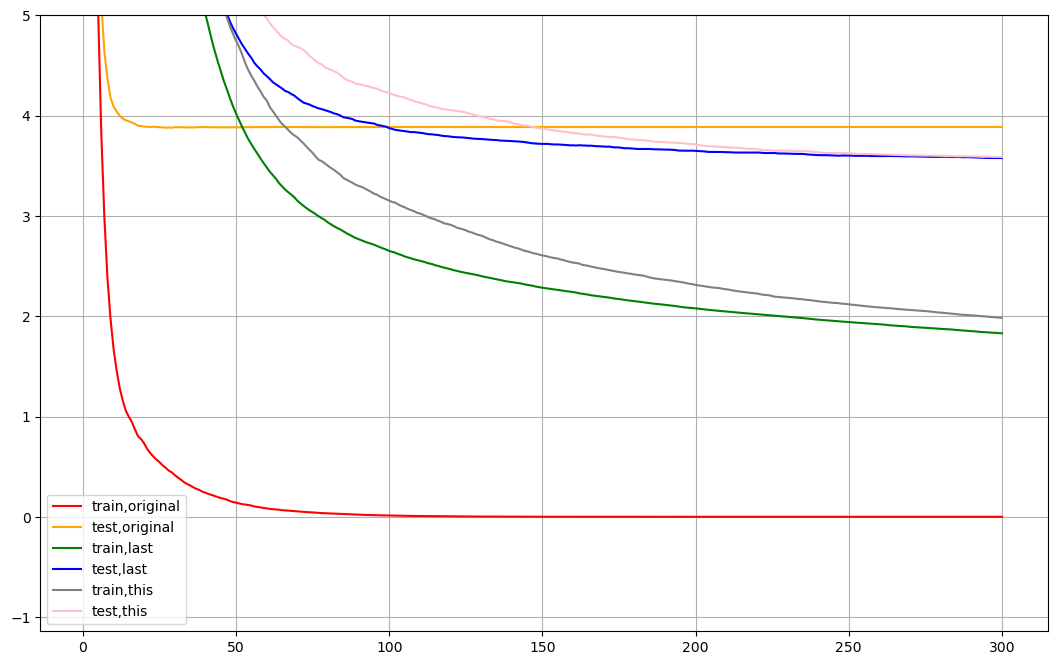

In [11]:
###调参过程####
param_ori = {'objective': 'reg:squarederror',
             'subsample' : 1,
             'max_depth' : 6,
             'eta': 0.3,
             'gamma': 0,
             'lambda': 1,
             'alpha': 0,
             'colsample_bytree': 1,
             'colsample_bylevel': 1,
             'colsample_bynode': 1,
             'eval_metric': 'rmse'
            }
num_round = 300

time0 = time()
cvresult = xgb.cv(param_ori,data_full,num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S"))

fig,subplot = plt.subplots(1,figsize = (13,8))
subplot.grid()
subplot.plot(range(1,301),cvresult.iloc[:,0],c = 'r',label = 'train,original')
subplot.plot(range(1,301),cvresult.iloc[:,2],c = 'orange',label = 'test,original')


param_last = {'objective': 'reg:squarederror',
             'subsample' : 1,
             'max_depth' : 2,
             'eta': 0.05,
             'gamma': 0,
             'lambda': 1,
             'alpha': 1,
             'colsample_bytree': 0.9,
             'colsample_bylevel': 0.5,
             'colsample_bynode': 1,
             'eval_metric': 'rmse'
            }
num_round_last = 300
param_this = {'objective': 'reg:squarederror',
             'subsample' : 1,
             'max_depth' : 2,
             'eta': 0.05,
             'gamma': 0,
             'lambda': 1,
             'alpha': 1,
             'colsample_bytree': 0.9,
             'colsample_bylevel': 0.5,
             'colsample_bynode': 0.4,
             'eval_metric': 'rmse'
            }
num_round_this = 300

time0 = time()
cvresult_last = xgb.cv(param_last,data_full,num_round_last)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S"))

time0 = time()
cvresult_this = xgb.cv(param_this,data_full,num_round_this)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S"))

subplot.plot(range(1,301),cvresult_last.iloc[:,0],c = 'green',label = 'train,last')
subplot.plot(range(1,301),cvresult_last.iloc[:,2],c = 'blue',label = 'test,last')
subplot.plot(range(1,301),cvresult_this.iloc[:,0],c = 'gray',label = 'train,this')
subplot.plot(range(1,301),cvresult_this.iloc[:,2],c = 'pink',label = 'test,this')


subplot.legend(loc = 0)
subplot.set_ylim(top = 5)
plt.show()

In [8]:
#使用网格搜索调参
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid = {
    'subsample': [0.7,0.75,0.8,0.85,0.9,0.95,1.0],
    'max_depth': [1,2,3,4,5,6],
    'eta': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15],
    'gamma': [0,0.25,0.5,0.75,1,1.25,1.5,2,2.5,3,4,5],
    'lambda': [0,0.25,0.5,1,1.5],
    'alpha': [0,0.25,0.5,1,1.5],
    'colsample_bytree': [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bylevel': [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'colsample_bynode': [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

# Define the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(x, y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best RMSE: ", -grid_search.best_score_)

MemoryError: 

In [13]:
#保存和调用建立好的模型
import pickle
dtrain = xgb.DMatrix(xtrain,ytrain)
param = {'objective': 'reg:squarederror',
         'subsample' : 1,'max_depth' : 2,
         'eta': 0.05,
         'gamma': 0,
         'lambda': 1,
         'alpha': 1,
         'colsample_bytree': 0.9,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 0.4,
         'eval_metric': 'rmse'
        }
num_round = 300

model_to_be_saved = xgb.train(param,data_full,num_round)

In [14]:
#保存模型
pickle.dump(model_to_be_saved,open('model_saved.dat','wb'))

In [4]:
#查看jupyterlab运行目录
import sys
sys.path
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pickle

In [5]:
dtest = xgb.DMatrix(xtest,ytest)
#读取模型
loaded_model = pickle.load(open('model_saved.dat','rb'))

In [6]:
ypreds = loaded_model.predict(dtest)
from sklearn.metrics import mean_squared_error as MSE,r2_score
MSE(ytest,ypreds)

6.3102251657261315

In [7]:
r2_score(ytest,ypreds)

0.9266221449191625

In [9]:
#另一种方式保存模型
import joblib
from sklearn.metrics import mean_squared_error as MSE,r2_score

In [9]:
joblib.dump(loaded_model,"model_saved_1.dat")

['model_saved_1.dat']

In [10]:
loaded_model_1 = joblib.load("model_saved_1.dat")
ypreds = loaded_model.predict(dtest)
MSE(ytest,ypreds)

6.3102251657261315

In [11]:
r2_score(ytest,ypreds)

0.9266221449191625

In [12]:
###保存sklearn版本的模型
model_2 = XGBR(n_estimators = 600,
               eta = 0.01,
               gamma = 4,
               reg_alpha = 0.2,
               max_depth = 4,
               colsample_bytree = 0.4
              ).fit(xtrain,ytrain)
joblib.dump(model_2,"model_saved_2.dat")

['model_saved_2.dat']

In [5]:
dtest = xgb.DMatrix(xtest,ytest)

In [10]:
loaded_model_2 = joblib.load("model_saved_2.dat")
ypreds = loaded_model_2.predict(xtest)
MSE(ytest,ypreds)

3.677931480118073

In [11]:
r2_score(ytest,ypreds)

0.9579644870844695

In [76]:
###xgboost中的分类树###
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,roc_auc_score

In [77]:
#不均衡样本
class_1 = 500
class_2 = 75
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
x,y = make_blobs(n_samples = [class_1,class_2],
                 centers = centers,
                 cluster_std = clusters_std,
                 shuffle = False
                )

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3)
(y == 1).sum()/y.shape[0] #少数类所占比例

0.13043478260869565

In [79]:
model = XGBClassifier().fit(xtrain,ytrain)
y_predict = model.predict(xtest)

In [80]:
model.score(xtest,ytest)

0.9248554913294798

In [81]:
confusion_matrix(ytest,y_predict,labels = [1,0])

array([[ 16,   6],
       [  7, 144]], dtype=int64)

In [82]:
recall_score(ytest,y_predict) #3/(3+15)

0.7272727272727273

In [83]:
roc_auc_score(ytest,model.predict_proba(xtest)[:,1])

0.9518362432269718

In [84]:
#使用不均衡参数
model_scaled = XGBClassifier(scale_pos_weight = 6.6667).fit(xtrain,ytrain)
y_predict_scaled = model_scaled.predict(xtest)
model_scaled.score(xtest,ytest)

0.9364161849710982

In [85]:
confusion_matrix(ytest,y_predict_scaled,labels = [1,0])

array([[ 19,   3],
       [  8, 143]], dtype=int64)

In [86]:
recall_score(ytest,y_predict_scaled)

0.8636363636363636

In [87]:
roc_auc_score(ytest,model_scaled.predict_proba(xtest)[:,1])

0.9488260084286575

In [88]:
for i in [1,2.5,5,7.5,10,15,20,25,30,50]:
    model_sca = XGBClassifier(scale_pos_weight = i).fit(xtrain,ytrain)
    y_predict_sca = model_sca.predict(xtest)
    print(i)
    print("\tAccuracy:{}".format(model_sca.score(xtest,ytest)))
    print("\tRecall:{}".format(recall_score(ytest,y_predict_sca)))
    print("\tAUC:{}".format(roc_auc_score(ytest,model_sca.predict_proba(xtest)[:,1])))

1
	Accuracy:0.9248554913294798
	Recall:0.7272727272727273
	AUC:0.9518362432269718
2.5
	Accuracy:0.9364161849710982
	Recall:0.8636363636363636
	AUC:0.9566526189042747
5
	Accuracy:0.9364161849710982
	Recall:0.8636363636363636
	AUC:0.9593618302227573
7.5
	Accuracy:0.9364161849710982
	Recall:0.8636363636363636
	AUC:0.9536423841059603
10
	Accuracy:0.9364161849710982
	Recall:0.8636363636363636
	AUC:0.9587597832630945
15
	Accuracy:0.9364161849710982
	Recall:0.8636363636363636
	AUC:0.9527393136664659
20
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9554485249849488
25
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9581577363034317
30
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9590608067429259
50
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9605659241420831


In [94]:
##使用xgb库处理样本不均衡问题
dtrain = xgb.DMatrix(xtrain,ytrain)
dtest = xgb.DMatrix(xtest,ytest)
param = {'objective':'binary:logistic',
         'eta':0.1,
         'scale_pos_weight':1
        }
num_round = 100
model = xgb.train(param,dtrain,num_round)

In [95]:
predicts = model.predict(dtest)

In [96]:
predicts #每个样本所对应的分类概率

array([0.00324745, 0.00324745, 0.00102405, 0.00141946, 0.08670244,
       0.00102405, 0.5403249 , 0.00102405, 0.00253473, 0.00301769,
       0.00324745, 0.01106578, 0.00102405, 0.01106578, 0.82118   ,
       0.00102405, 0.6861517 , 0.00102405, 0.5401574 , 0.00102405,
       0.0087653 , 0.00463395, 0.97388476, 0.00102405, 0.00102405,
       0.7822179 , 0.9531424 , 0.00102405, 0.799188  , 0.00297711,
       0.00280732, 0.00102405, 0.92690206, 0.002694  , 0.00280732,
       0.00297711, 0.00301769, 0.01106578, 0.00280732, 0.00324745,
       0.44335985, 0.00194747, 0.00102405, 0.00280732, 0.00141946,
       0.00102405, 0.00141946, 0.00102405, 0.00102405, 0.01104499,
       0.00102405, 0.00102405, 0.00280732, 0.00102405, 0.002694  ,
       0.94231933, 0.00723665, 0.4185722 , 0.00150515, 0.74989104,
       0.00575692, 0.00102405, 0.00437789, 0.00102405, 0.00102405,
       0.00102405, 0.00301769, 0.00102405, 0.10074176, 0.00454033,
       0.00324745, 0.002694  , 0.00102405, 0.01106578, 0.00102

In [101]:
#需要自己设定阈值
y_predict = predicts.copy()
y_predict[predicts > 0.5] = 1
y_predict[y_predict != 1] = 0

In [102]:
y_predict

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [105]:
scale_pos_weight = [1,2.5,5,7.5,10,15,20,25,30,50]
names = ["scale_weight  1:1","scale_weight  1:2.5","scale_weight  1:5","scale_weight  1:7.5","scale_weight  1:10",
         "scale_weight  1:15","scale_weight  1:20","scale_weight  1:25","scale_weight  1:30","scale_weight  1:50"]
from sklearn.metrics import accuracy_score
for name,i in zip(names,scale_pos_weight):
    param = {'objective':'binary:logistic',
             'eta':0.1,
             'scale_pos_weight':i
            }
    num_round = 200
    model = xgb.train(param,dtrain,num_round)
    predicts = model.predict(dtest)
    y_predict = predicts.copy()
    y_predict[predicts > 0.5] = 1
    y_predict[y_predict != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy_score(ytest,y_predict)))
    print("\tRecall:{}".format(recall_score(ytest,y_predict)))
    print("\tAUC:{}".format(roc_auc_score(ytest,y_predict)))

scale_weight  1:1
	Accuracy:0.930635838150289
	Recall:0.7727272727272727
	AUC:0.8631848284166164
scale_weight  1:2.5
	Accuracy:0.930635838150289
	Recall:0.8181818181818182
	AUC:0.8826008428657436
scale_weight  1:5
	Accuracy:0.9364161849710982
	Recall:0.8636363636363636
	AUC:0.9053281155930163
scale_weight  1:7.5
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:10
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:15
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:20
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:25
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:30
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:50
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889


In [108]:
#调节概率的阈值
scale_pos_weight = [1,2.5,5,7.5,10,15,20,25,30,50]
names = ["scale_weight  1:1","scale_weight  1:2.5","scale_weight  1:5","scale_weight  1:7.5","scale_weight  1:10",
         "scale_weight  1:15","scale_weight  1:20","scale_weight  1:25","scale_weight  1:30","scale_weight  1:50"]
from sklearn.metrics import accuracy_score
for name,i in zip(names,scale_pos_weight):
    for thres in [0.1,0.3,0.5,0.7,0.9]:
        param = {'objective':'binary:logistic',
                 'eta':0.1,
                 'scale_pos_weight':i
                }
        num_round = 200
        model = xgb.train(param,dtrain,num_round)
        predicts = model.predict(dtest)
        y_predict = predicts.copy()
        y_predict[predicts > thres] = 1
        y_predict[y_predict != 1] = 0
        print('{},threshold:{}'.format(name,thres))
        print("\tAccuracy:{}".format(accuracy_score(ytest,y_predict)))
        print("\tRecall:{}".format(recall_score(ytest,y_predict)))
        print("\tAUC:{}".format(roc_auc_score(ytest,y_predict)))

scale_weight  1:1,threshold:0.1
	Accuracy:0.930635838150289
	Recall:0.9090909090909091
	AUC:0.9214328717639977
scale_weight  1:1,threshold:0.3
	Accuracy:0.930635838150289
	Recall:0.8636363636363636
	AUC:0.9020168573148707
scale_weight  1:1,threshold:0.5
	Accuracy:0.930635838150289
	Recall:0.7727272727272727
	AUC:0.8631848284166164
scale_weight  1:1,threshold:0.7
	Accuracy:0.9190751445086706
	Recall:0.6363636363636364
	AUC:0.798314268512944
scale_weight  1:1,threshold:0.9
	Accuracy:0.8959537572254336
	Recall:0.36363636363636365
	AUC:0.6685731487055991
scale_weight  1:2.5,threshold:0.1
	Accuracy:0.930635838150289
	Recall:0.9090909090909091
	AUC:0.9214328717639977
scale_weight  1:2.5,threshold:0.3
	Accuracy:0.9421965317919075
	Recall:0.9090909090909091
	AUC:0.9280553883202889
scale_weight  1:2.5,threshold:0.5
	Accuracy:0.930635838150289
	Recall:0.8181818181818182
	AUC:0.8826008428657436
scale_weight  1:2.5,threshold:0.7
	Accuracy:0.9190751445086706
	Recall:0.6818181818181818
	AUC:0.817730

In [116]:
#使用网格搜索实现
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import ParameterGrid

scale_pos_weight = [1, 2.5, 5, 7.5, 10, 15, 20, 25, 30]
names = [
    "scale_weight  1:1", "scale_weight  1:2.5", "scale_weight  1:5", "scale_weight  1:7.5", "scale_weight  1:10",
    "scale_weight  1:15", "scale_weight  1:20", "scale_weight  1:25", "scale_weight  1:30"
]
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_accuracy = 0
best_recall = 0
best_accuracy_params = {}
best_recall_params = {}

param_grid = {
    'objective': ['binary:logistic'],
    'eta': [0.1],
    'scale_pos_weight': scale_pos_weight
}

grid = ParameterGrid(param_grid)

for params in grid:
    for name, thres in zip(names, thresholds):
        model = xgb.train(params, dtrain, num_round)
        predicts = model.predict(dtest)
        y_predict = predicts.copy()
        y_predict[predicts > thres] = 1
        y_predict[y_predict != 1] = 0
        accuracy = accuracy_score(ytest, y_predict)
        recall = recall_score(ytest, y_predict)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_accuracy_params = (name, thres, params)

        if recall > best_recall:
            best_recall = recall
            best_recall_params = (name, thres, params)

print("Best Accuracy:")
print("\tName: {}, Threshold: {}, Params: {}".format(*best_accuracy_params))
print("\tAccuracy: {}".format(best_accuracy))

print("Best Recall:")
print("\tName: {}, Threshold: {}, Params: {}".format(*best_recall_params))
print("\tRecall: {}".format(best_recall))


Best Accuracy:
	Name: scale_weight  1:5, Threshold: 0.3, Params: {'eta': 0.1, 'objective': 'binary:logistic', 'scale_pos_weight': 2.5}
	Accuracy: 0.9421965317919075
Best Recall:
	Name: scale_weight  1:1, Threshold: 0.1, Params: {'eta': 0.1, 'objective': 'binary:logistic', 'scale_pos_weight': 1}
	Recall: 0.9090909090909091
